# Importing libraries

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml('mnist_784',as_frame = False) # fetches mnist handwritten digit dataset

In [3]:
print(type(mnist)) # Bunch is a subclass of class Dictionary

<class 'sklearn.utils.Bunch'>


# Preparing Dataset

In [4]:
print(mnist) # output is a dictionary

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object), 'frame': None, 'categories': {}, 'feature_names': ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', '

In [5]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [6]:
print(type(mnist.keys()))

<class 'dict_keys'>


In [7]:
#print(mnist.DESCR) #Displays Information about the dataset
#print(mnist['DESCR'])# does same as above line of code

In [8]:
x,y= mnist['data'],mnist['target'] # Splitting data and target into variable x and y respectively

In [9]:
print(type(x),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [10]:
print(x.shape,y.shape)

(70000, 784) (70000,)


# For Plotting some Images

In [11]:
p = np.random.permutation(len(x)) # Generating random indexes

In [12]:
p = p[:20] #selecting first 20 numbers from p array and putting it inside p

In [13]:
print(p)

[42767  1701  9873 48511 45029 12724 21627 69937 68200 66594  2643 67250
 68378 10178 35750 10295 30666 14528 33986 13623]


In [14]:
print(type(p))

<class 'numpy.ndarray'>


In [15]:
print(p.dtype)

int32


# Image plotting Function

In [16]:
pixels_of_images = x[p] # Inserting 20 numpy array elements whose index is given by numpy array p into pixels_of_images variable
labels_of_images = y[p] # Inserting the labels of those selected 20 images into labels_of_images variable

In [17]:
# We will be displaying 20 images from mnist dataset
# So creating a function that will diplay 20 images using matplotlib

def plot_images(images,labels):
    # images parameter will be a 2-d numpy array of shape 28*28 of 20 images
    # labels parameter will be a 1-d numpy array of those 20 images
    n_cols = 5
    n_rows = 4
    fig=plt.figure(figsize=(8,8))

    for i in range(n_rows*n_cols):
        sp =fig.add_subplot(n_rows , n_cols,i+1)
        plt.axis("off")
        plt.imshow(images[i],cmap= matplotlib.cm.binary,interpolation = "nearest")
        sp.set_title("Label : {}".format(labels[i]))
    plt.show()

# Displaying some images and their labels

In [18]:
print(pixels_of_images.shape)
poi = pixels_of_images.reshape(-1,28,28) # Reshaping our 2-dimensional numpy array into 3-dimensional of shape 20*28*28

(20, 784)


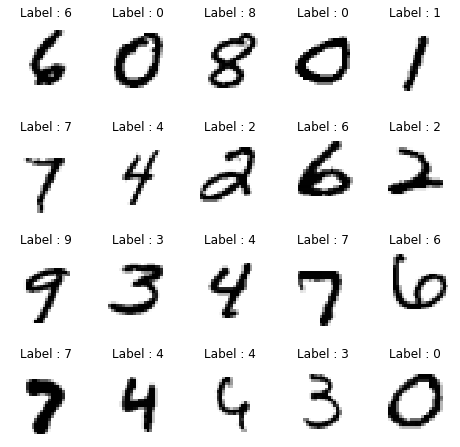

In [19]:
#plotting images
plot_images(poi,labels_of_images)

# Preparing training and test dataset

In [20]:
# importing train_test_split class from model_selection.py of sklearn packadge or library
from sklearn.model_selection import train_test_split

# splitting x and y into train_x, test_x and train_y,test_y such that 10 percent of the data 
# reserved or inserted into test_x and test_y for testing the model
train_x,test_x,train_y,test_y= train_test_split(x,y,test_size= 0.10) 

In [21]:
print(type(train_x),type(test_x),type(train_y),type(test_y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [22]:
print("length of train_x = ",len(train_x)) # no of images in train_x
print("length of train_y = ",len(train_y)) # no of labels of images in train_y
print("length of test_x = ",len(test_x)) # no of images in test_x
print("length of test_x = ",len(test_y)) # no of labels of images in test_x

length of train_x =  63000
length of train_y =  63000
length of test_x =  7000
length of test_x =  7000


# Pixels of test images

In [23]:
i = np.random.permutation(7000)  # creating a numpy of length 7000 containing numbers from 0 to 6999 in random fashion
print(type(i)) 
i = i[:20] # selecting the first 20 numbers or items from i
print(i)

<class 'numpy.ndarray'>
[ 421 4951  255 2770 4617 1627  585 4691  667 1031 3324  208 2662  490
 4863 5840 2012 4394 2629 1528]


In [24]:
## Reshaping the 

pixels_of_test_images = test_x[i] # inserting pixels of those 20 images whose indexes are in i
poti = pixels_of_test_images.reshape(-1,28,28)

# Applying different classification machine learning algorithms

# 1. Logistic regression classifier

In [25]:
from sklearn.linear_model import LogisticRegression # importing logistic regression classifier or algorithm
LGR_clsfr = LogisticRegression() # creating a logistic regression classifier or object
LGR_clsfr.fit(train_x,train_y) # Giving train_x and train_y to fit() method to train the model

C:\Users\swapn\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [26]:
LGR_clsfr.score(test_x,test_y) # Checking the accuracy of our model

0.9181428571428571

In [27]:
LGR_pred = LGR_clsfr.predict(test_x) # inserting the labels predicted of test_x by linear regression model into LR_pred 
print(type(LGR_pred)) 
print(len(LGR_pred))

<class 'numpy.ndarray'>
7000


In [28]:
LGR_pred_20 = LGR_pred[i]

# Test images and their labels predicted by LR_clsfr

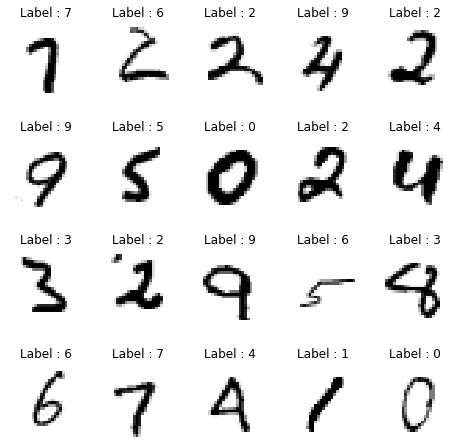

In [29]:
plot_images(poti,LGR_pred_20)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(test_y,LGR_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       747
           1       0.95      0.98      0.96       797
           2       0.91      0.88      0.90       703
           3       0.90      0.89      0.89       748
           4       0.92      0.93      0.93       650
           5       0.88      0.87      0.87       615
           6       0.94      0.94      0.94       697
           7       0.94      0.92      0.93       733
           8       0.88      0.86      0.87       653
           9       0.89      0.91      0.90       657

    accuracy                           0.92      7000
   macro avg       0.92      0.92      0.92      7000
weighted avg       0.92      0.92      0.92      7000



# 2. Decision Tree

In [31]:
from sklearn import tree # importing tree.py from sklearn package
DT_clsfr = tree.DecisionTreeClassifier()
DT_clsfr.fit(train_x,train_y)

DecisionTreeClassifier()

In [32]:
DT_clsfr.score(test_x,test_y)

0.8787142857142857

In [33]:
DT_pred = DT_clsfr.predict(test_x)

In [34]:
print(classification_report(test_y,DT_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       747
           1       0.95      0.96      0.95       797
           2       0.87      0.86      0.87       703
           3       0.85      0.85      0.85       748
           4       0.87      0.88      0.87       650
           5       0.83      0.83      0.83       615
           6       0.93      0.91      0.92       697
           7       0.92      0.90      0.91       733
           8       0.79      0.79      0.79       653
           9       0.81      0.84      0.82       657

    accuracy                           0.88      7000
   macro avg       0.88      0.88      0.88      7000
weighted avg       0.88      0.88      0.88      7000



In [35]:
print(i)
DT_pred_20 = DT_pred[i] # selecting 20 random images

[ 421 4951  255 2770 4617 1627  585 4691  667 1031 3324  208 2662  490
 4863 5840 2012 4394 2629 1528]


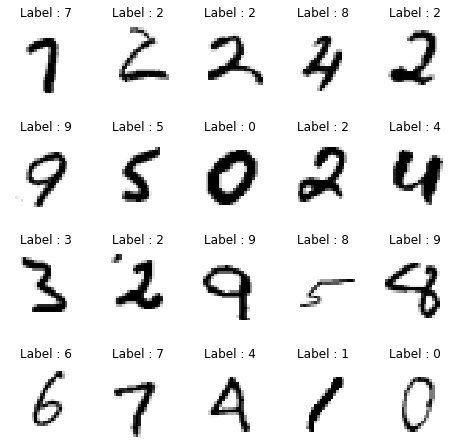

In [36]:
plot_images(poti,DT_pred_20)

# 3.Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
RF_clsfr= RandomForestClassifier()
RF_clsfr.fit(train_x,train_y)

RandomForestClassifier()

In [38]:
RF_clsfr.score(test_x,test_y)
RF_pred = RF_clsfr.predict(test_x)
print(classification_report(test_y,RF_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       747
           1       0.98      0.99      0.99       797
           2       0.97      0.98      0.97       703
           3       0.97      0.96      0.97       748
           4       0.96      0.97      0.97       650
           5       0.96      0.97      0.97       615
           6       0.98      0.98      0.98       697
           7       0.98      0.97      0.97       733
           8       0.95      0.96      0.95       653
           9       0.94      0.94      0.94       657

    accuracy                           0.97      7000
   macro avg       0.97      0.97      0.97      7000
weighted avg       0.97      0.97      0.97      7000



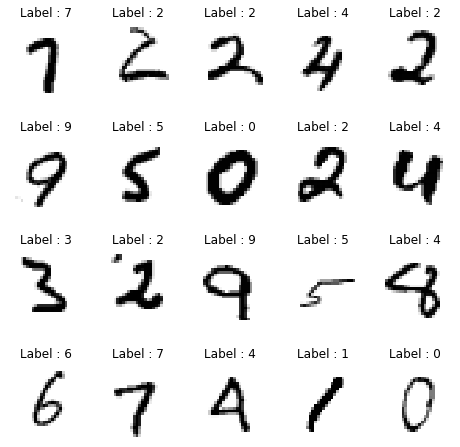

In [39]:
RF_pred_20 = RF_pred[i]
plot_images(poti,RF_pred_20)

# 4.Support vector machine

In [ ]:
from sklearn.svm import SVC
SVC_clsfr = SVC()
SVC_clsfr.fit(train_x,train_y)
SVC_clsfr.score(test_x,test_y)

In [ ]:
SVM_pred= SVC_clsfr.predict(test_x)
SVM_pred_20 = SVM_pred[i]

In [ ]:
print(classification_report(test_y,SVM_pred))

In [ ]:
plot_images(poti,SVM_pred_20)